In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()            

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys() 

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
Measurement_Dta = Measurement

latest_date = session.query(func.max(Measurement.date)).scalar()

print(latest_date)

2017-08-23


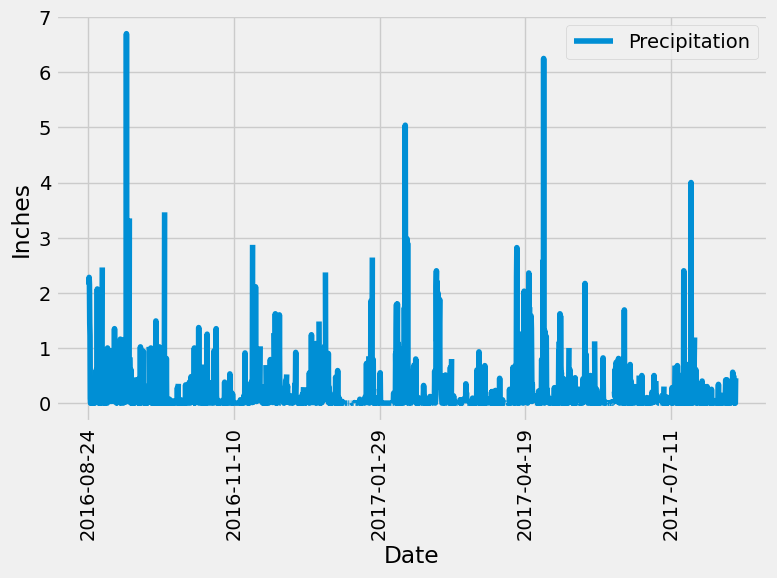

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(func.max(Measurement.date)).scalar()

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
last_year_df = last_year_df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(8, 6))

last_year_df.set_index('date')['precipitation'].plot(
    kind='line', 
    label='Precipitation', 
    xlabel='Date', 
    ylabel='Inches', 
    rot=90  # Rotates x-axis labels for better readability
)

plt.legend()  # Add chart legend
plt.tight_layout()  # Adjust the layout so that the chart is well organized
plt.show()  # Display the graph


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = last_year_df.describe()
summary.head(10)

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

print(total_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

sort_station = sorted(active_station, key=lambda x: x[1], reverse=True)

for station in sort_station:
    print(station)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),
                            func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(temperature)

[(54.0, 85.0, 71.66378066378067)]


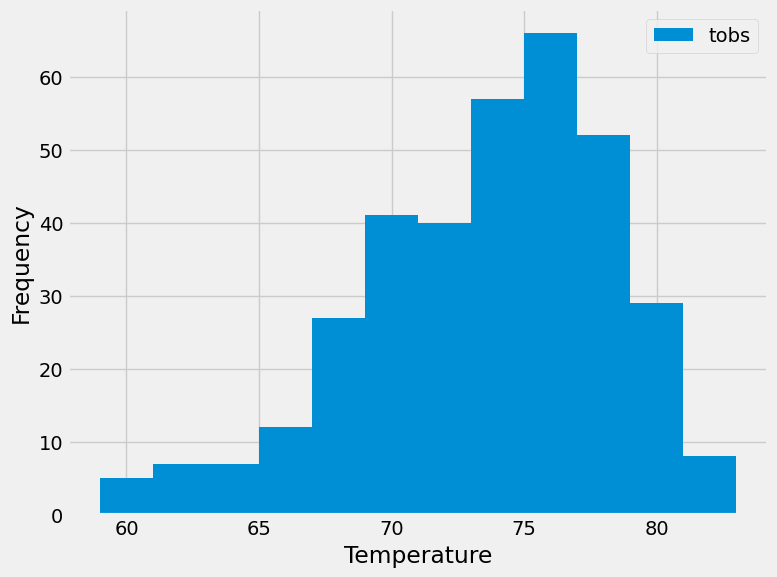

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query((Measurement.tobs)).filter(Measurement.date >= last_year).filter(Measurement.station == 'USC00519281').all()
#print(most_active_station)

# Save the query results as a Pandas DataFrame
most_active_station_df = pd.DataFrame(most_active_station, columns=['tobs'])

# Plot the results as a histogram with bins=12, as the following image shows:
plt.figure(figsize=(8,6))
plt.hist(most_active_station_df, bins=12, label=["tobs"]) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()